In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

C:\Users\Nick Ouwerkerk\AppData\Local\Temp\ipykernel_16500\2151744951.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
data = pd.read_csv('../data/all_data.csv')

In [3]:
#print all columns
for i in (list(data.columns.values)):
    print(i)

adres_aantal_brp_adres
adres_aantal_verschillende_wijken
adres_aantal_verzendadres
adres_aantal_woonadres_handmatig
adres_dagen_op_adres
adres_recentst_onderdeel_rdam
adres_recentste_buurt_groot_ijsselmonde
adres_recentste_buurt_nieuwe_westen
adres_recentste_buurt_other
adres_recentste_buurt_oude_noorden
adres_recentste_buurt_vreewijk
adres_recentste_plaats_other
adres_recentste_plaats_rotterdam
adres_recentste_wijk_charlois
adres_recentste_wijk_delfshaven
adres_recentste_wijk_feijenoord
adres_recentste_wijk_ijsselmonde
adres_recentste_wijk_kralingen_c
adres_recentste_wijk_noord
adres_recentste_wijk_other
adres_recentste_wijk_prins_alexa
adres_recentste_wijk_stadscentru
adres_unieke_wijk_ratio
afspraak_aanmelding_afgesloten
afspraak_aantal_woorden
afspraak_afgelopen_jaar_afsprakenplan
afspraak_afgelopen_jaar_monitoring_insp__wet_taaleis_na_12_mnd_n_a_v__taa04_____geen_maatregel
afspraak_afgelopen_jaar_ontheffing
afspraak_afgelopen_jaar_ontheffing_taaleis
afspraak_afgelopen_jaar_plan_va

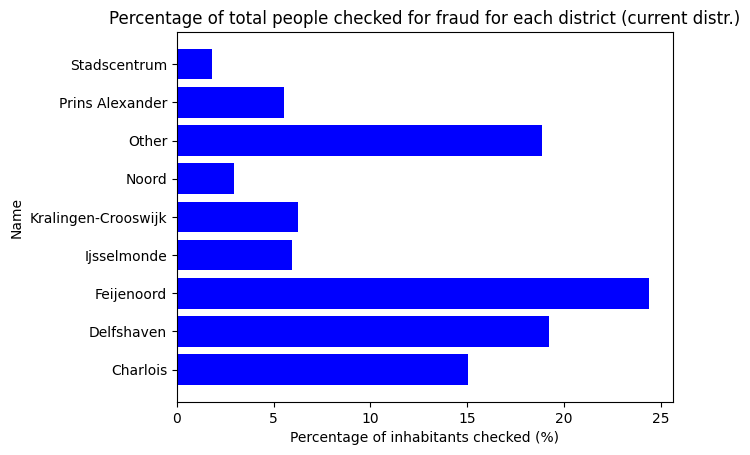

In [4]:
# Distribution of inhabitants checked for fraud per district (wijk) as given in the dataset

wijken = data.filter(like='adres_recentste_wijk', axis=1)
wijken_count = wijken.sum(axis=0)
wijken_total_count = wijken_count.sum(axis=0)

percentages = (wijken_count / wijken_total_count) * 100

#Full names in the same order as they appear in 'wijken'
wijk_names = np.array(['Charlois', 'Delfshaven', 'Feijenoord', 'Ijsselmonde', 'Kralingen-Crooswijk',
                       'Noord', 'Other', 'Prins Alexander', 'Stadscentrum'])

# Plot the histogram (bar chart)
plt.barh(wijk_names, percentages, color='blue')

# Add labels and title
plt.xlabel('Percentage of inhabitants checked (%)')
plt.ylabel('Name')
plt.title('Percentage of total people checked for fraud for each district (current distr.)')

# Show the plot
plt.show()

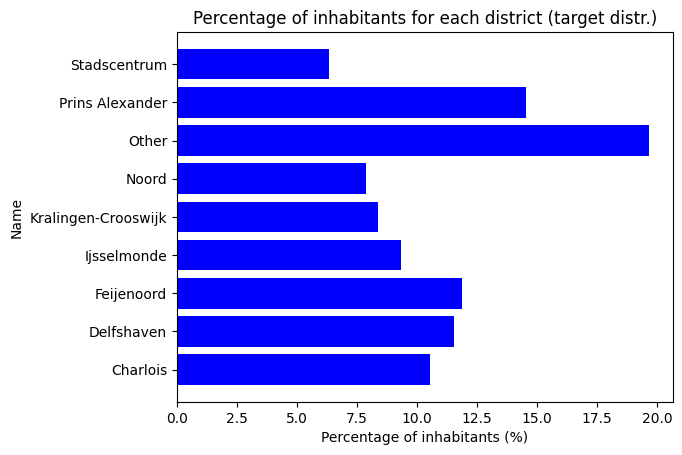

In [5]:
# Distribution on inhabitants per district

#https://allecijfers.nl/gemeente-overzicht/rotterdam/ (2024)
inhabitants_per_wijk = {
    'Charlois': 70525,
    'Delfshaven': 77250,
    'Feijenoord': 79440,
    'Ijsselmonde': 62670,
    'Kralingen-Crooswijk': 56010,
    'Noord': 52795,
    'Other': 131855,
    'Prins Alexander': 97430,
    'Stadscentrum': 42565,
}

inhabitants_array = np.array([inhabitants_per_wijk[wijk] for wijk in wijk_names])
inhabitants_percentages = (inhabitants_array / np.sum(inhabitants_array)) * 100

plt.barh(wijk_names, inhabitants_percentages, color='blue')

# Add labels and title
plt.xlabel('Percentage of inhabitants (%)')
plt.ylabel('Name')
plt.title('Percentage of inhabitants for each district (target distr.)')

# Show the plot
plt.show()
